<a href="https://colab.research.google.com/github/iamdurgesh/ML-Projects-By-Topic/blob/primary/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import sys

assert sys.version_info >= (3, 7)

In [25]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [26]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [27]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [28]:
from sklearn.datasets import fetch_openml

In [29]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [30]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [31]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [32]:
X, y = mnist.data, mnist.target

In [33]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
X.shape

(70000, 784)

In [35]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [36]:
y.shape

(70000,)

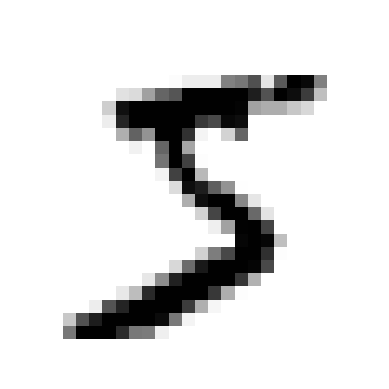

In [37]:
# The dataset has 784 features as each feature represents one pixel intensity and img size is 28*28
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap = "binary")
  plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [38]:
y[123]

'7'

In [39]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [40]:
# Training a Binary Classifier
#creating target vector for the clssification task
y_train_5 = (y_train == '5') # true for all 5s only
y_test_5 = (y_test == '5')

In [41]:
# Training on a SGD Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [42]:
sgd_clf.predict([some_digit])

array([ True])

In [43]:
# Evaluating Performance Measures
#1. Using Cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [44]:
# Using a dummy classifier from most frequet class as a negative class(non 5)
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))  # should print false

False


In [45]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#The result shows that 90% of the images are non 5s, so accuracy is not a good parameter to measure performance!!

array([0.90965, 0.90965, 0.90965])

In [47]:
# Using Confusion Matrix for better performance measure
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf ,X_train, y_train_5, cv=3)

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [49]:
y_train_perfect_predictions = y_train_5     # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [50]:
# Calculating Precision and Recall Score (pg:110)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)      # == 3530/(687+3530)

0.8370879772350012

In [54]:
# computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [51]:
recall_score(y_train_5, y_train_pred)     #== 3530/(1891+3530)

0.6511713705958311

In [55]:
# computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [53]:
# Calculating F1-Score (harmonic mean of precision and recall) (pg111)
from sklearn.metrics import f1_score    # only use when there is not much difference b/w the ratio of precision and recall
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [56]:
# The Precision/Recall Trade-off
# the SGDClassifier decides based on the score from decision function, assigns to positive class if the score is greater than threshold
# calling Sklearn's decision function to alter the threshold
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [57]:
threshold = 0     # SGD uses a threshold = 0

In [59]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [81]:
threshold = 3000

In [82]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [83]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [84]:
# Creating a prediction recall curve
from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


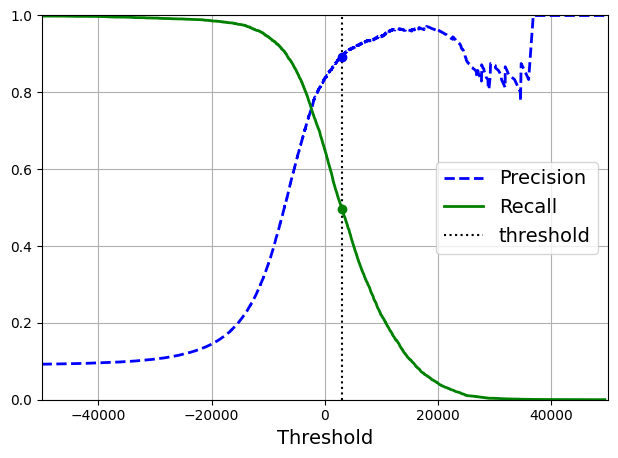

In [90]:
plt.plot(thresholds, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

#adding legends, axis and labels
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precision[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")
plt.show()